---
---

<h1 align='center'><b>Datamites Client Project</b></font></h1>
<h2 align='center'><font color="Blue"><b>Buisness Case for  PRCL-0015</b></font></h2>
<h3 align='center'><font color="Black"><b>Client: Bank GoodCredit | Category: Banking - Risk</b></font></h3>

---

<b>Project Team ID : </b>PTID-CDS-AUG-23-1608 <br>
<b>Project Start Date :</b> 18-10-2023</font></h4>

---
---

# Contents:

* [Domain Analysis:](#Domain-Analysis)
* [Data Explanation:](#Data-Explanation:)
* [Project Objectives:](#Project-Objectives:)

Project

+ [Loading Data:](#Loading-Data:)
+ [Basic Analysis before merging the files:](#Basic-Analysis-before-merging-the-files:)
+ [Feature Selection:](#Feature-Selection:)
+ [Feature Engineering: Data merging:](#Feature-Engineering:-Data-merging:)
+ [Basic Analysis:](#Basic-Analysis:)
+ [Data Preprocessing:](#Data-Preprocessing:)
+ [Exploratory Data Analysis:](#Exploratory-Data-Analysis:)
+ [Data Preprocessing - continuation:](#Data-Preprocessing---continuation:)
+ [Data Scaling/Normalization:](#Data-Scaling/Normalization:)
+ [Displaying correlation matrix:](#Displaying-correlation-matrix:)
+ [Feature Selection - continuation:](#Feature-Selection---continuation:)
+ [Splitting the data for Training and Testing:](#Splitting-the-data-for-Training-and-Testing:)
+ [Balancing the Data:](#Balancing-the-Data:)
+ [Model Creation:](#Model-Creation:)
    1. [Logistic Regression](#1.-Logistic-Regression)
    2. [Support Vector machine](#2.-Support-Vector-machine)
    3. [Decision Tree Classifier](#3.-Decision-Tree-Classifier)
        * [Hyperparameter Tuning for Decision Tree Classifier](#Hyperparameter-Tuning-for-Decision-Tree-Classifier)
    4. [Random Forest Classifier](#4.-Random-Forest-Classifier)
    5. [K-Nearest Neighbors Classifier](#5.-K-Nearest-Neighbors-Classifier)
    6. [XGBoosting Classifier](#6.-XGBoosting-Classifier)
        * [Hyperparameter Tuning for XGBoost model](#Hyperparameter-Tuning-for-XGBoost-model)
        * [Checking Learning Curves for XGB model:](#Checking-Learning-Curves-for-XGB-model:)
        
* [Accuracy Comparison and Evaluation:](#Accuracy-Comparison-and-Evaluation:)
* [Conclusion:](#Conclusion:)

# 

### Domain Analysis:

Bank Good Credit wants to predict cred score for current credit card customers. <br> The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk. <br> Target variable →  Bad label <br>
0 –  Customer has Good credit history <br>
1 –  Customer has Bad credit history (falls into  30 DPD + bucket) <br>
Our benchmark model has gini as 37.9<br>

Business Case: <br>
Bank GoodCredit  wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.  <br><br>
Target variable →  Bad_label <br>
0 –  Customer has Good credit history <br>
1 –  Customer has Bad credit history (falls into  30 DPD + bucket) <br>
Our benchmark model has gini as 37.9.  

# 

### Data Explanation:
* Customer Account Data  (Table : Cust_Account): <br>
This table contains customer’s historical accounts data and payments history  
* Customer Enquiry Data  (Table : Cust_Enquiry): <br>
This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
* Demographics Data  (Table : Cust_Demographics): <br>
Current customer applications with demographic data Note that demographics features are renamed as features and obscured in accordance with privacy policies.

# 

### Project Objectives:

Build a model with the data provided :- <br>
1. Data exploration insights – what did you find and what decision did you take?
2. Feature matrix - List of features selected with gain
3. Model evaluation - Gini and rank ordering

Data Set Fields: <br>
Host: 18.136.157.135 <br>
Port: 3306 <br>
Username : dm_team1 <br>
Password: DM!$Team&279@20!  <br>
Database : project_banking

#

### Loading Data:

#### Loading Packages:

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [ ]:
# Install required libraries (optional)

In [ ]:
!pip install mysql.connector

In [ ]:
# For making connections to database server
import mysql.connector

#

In [ ]:
# Establish a connection to the database
connection = mysql.connector.connect(host ='18.136.157.135',
                                    port = 3306,
                                    user ='dm_team1',
                                    password ='DM!$Team&279@20!',
                                    database ='project_banking')

In [ ]:
# Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [ ]:
# Fetch database tables from 'project_banking'
database_tables=pd.read_sql_query('show tables',connection)
print(database_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


#

##### Loading Cust_Account

In [ ]:
# Load data1 from database tables
query_1='select *from Cust_Account'
data1=pd.read_sql(query_1,connection)

print(data1.shape)
data1.head()

(186329, 21)


,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


##### Loading Cust_Demographics

In [ ]:
# Load data2 from database tables
query_2 = 'select *from Cust_Demographics'
data2=pd.read_sql(query_2,connection)

print(data1.shape)
data2.head()

(186329, 21)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


##### Loading Cust_Enquiry

In [ ]:
# Load data3 from database tables
query_3 = 'select *from Cust_Enquiry'
data3 = pd.read_sql(query_3,connection)

print(data3.shape)
data3.head()

(413188, 6)


,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000


##### Close the database connection

In [ ]:
connection.close()

#

#### Saving the above to CSVs

In [ ]:
data1.to_csv('Original_Cust_Account.csv', index=False)

In [ ]:
data2.to_csv('Original_Cust_Demographics.csv', index=False)

In [ ]:
data3.to_csv('Original_Cust_Enquiry.csv', index=False)

#

### Basic Analysis before merging the files:

In [ ]:
data1.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1',
       'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit',
       'cashlimit', 'rateofinterest', 'paymentfrequency',
       'actualpaymentamount'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dt_opened            186329 non-null  object
 1   customer_no          186329 non-null  object
 2   upload_dt            186329 non-null  object
 3   acct_type            186329 non-null  object
 4   owner_indic          186329 non-null  object
 5   opened_dt            186329 non-null  object
 6   last_paymt_dt        186329 non-null  object
 7   closed_dt            186329 non-null  object
 8   reporting_dt         186329 non-null  object
 9   high_credit_amt      186329 non-null  object
 10  cur_balance_amt      186329 non-null  object
 11  amt_past_due         186329 non-null  object
 12  paymenthistory1      186329 non-null  object
 13  paymenthistory2      186329 non-null  object
 14  paymt_str_dt         186329 non-null  object
 15  paymt_end_dt         186329 non-nu

In [ ]:
data2.columns

Index(['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       '

In [ ]:
data2.head(10)

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
5,12-May-15,6,06-May-15,Insignia,06-May-15,779,1,Card Setup,14,1000000,,,,Y,IS1,,0,88,5231,5231,,1,ABQPNXXXXX,10-Jul-63,99202XXXXX,N,@GMAIL.COM,1,3,,Mumbai / Navi Mumbai / Thane,400012,2000,0,Self,Y,2,1,,,,0,0,0,0,Mumbai,400001,@HSBC.CO.IN,,XXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,21,,Y,Y,N,,Y,2000-0,21,15,400012,0,2,1,Nov-00,21,R,,,10/27/63,1,99870XXXXX,1,N,0
6,22-May-15,7,06-May-15,Insignia,06-May-15,762,1,Card Setup,14,100000,,,,Y,IS2,,0,100,5957,6031,,1,AAKPDXXXXX,22-Apr-54,98100XXXXX,N,@VSNL.NET,1,0,,New Delhi,110075,1964,0,Self,Y,1,1,Government Organisation,Others,ADMIN OFFICER,2014,1,11,0,New Delhi,110021,@VSNL.NET,PAN Card,AAKPDXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,10,,Y,Y,N,,Y,1964-0,10,157,110075,0,1,1,0-0,10,O,,,0000-00-00,0,98100XXXXX,1,N,0
7,22-May-15,8,15-May-15,Insignia,15-May-15,799,1,Card Setup,14,357000,,,,Y,IS2,,0,88,5785,5785,,1,ABZPDXXXXX,26-Apr-51,96865XXXXX,N,@PRUDENTBROKERS.COM,1,3,,Bengaluru,560052,1964,0,Self,Y,2,1,,,,0,0,0,0,Mumbai,400025,,PAN Card,ABZPDXXXXX,,,N,,0,,17-Jun-16,1,17,,N,Y,N,,Y,1964-0,17,12,560052,0,2,1,Nov-00,21,R,,,0000-00-00,0,96865XXXXX,1,N,0
8,28-May-15,9,15-May-15,Insignia,15-May-15,762,1,Card Setup,14,550000,,,,Y,IS2,,0,88,5785,5785,,1,AAFPDXXXXX,01-Sep-

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

In [ ]:
data2.describe()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896
unique,197,23896,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,1,19-Oct-15,Platinum Maxima,,,3,Card Setup,14,35000,,,,Y,PM1,,12,SA03,AS19,,,1,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,699,1,180,9056,2836,2836,14593,23881,23881,797,22635,22635,23845,22611,8853,13004,10892,9331,1374,22869,23878,22701,16,33,194,21528,15595,18295,15503,14610,12539,1097,1839,21315,10833,19478,18214,8392,8677,13187,5682,5667,6344,5944,23181,9760,2320,13713,22796,94,18399,23792,12565,11422,11807,11610,23881,22693,12539,21503,23425,22611,23563,23887,23876,1670,10257,10257,944,19478,18214,8392,18235,9760,15617,20951,23879,23820,23817,2149,22958,23876,22892


In [ ]:
data2.describe(include='O')

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896
unique,197,23896,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,1,19-Oct-15,Platinum Maxima,,,3,Card Setup,14,35000,,,,Y,PM1,,12,SA03,AS19,,,1,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,699,1,180,9056,2836,2836,14593,23881,23881,797,22635,22635,23845,22611,8853,13004,10892,9331,1374,22869,23878,22701,16,33,194,21528,15595,18295,15503,14610,12539,1097,1839,21315,10833,19478,18214,8392,8677,13187,5682,5667,6344,5944,23181,9760,2320,13713,22796,94,18399,23792,12565,11422,11807,11610,23881,22693,12539,21503,23425,22611,23563,23887,23876,1670,10257,10257,944,19478,18214,8392,18235,9760,15617,20951,23879,23820,23817,2149,22958,23876,22892


In [ ]:
data3.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose',
       'enq_amt'],
      dtype='object')

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


#### Insights:
'customer_no' column is the unique identifier for each customer from all 3 data tables.

#

### Feature Selection:

In [ ]:
# Selecting only imp columns
df1=data1[['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','cashlimit','creditlimit']]
df1

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,12265,20900,0,,,
1,12265,16201,10390,,1400,14000
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,
...,...,...,...,...,...,...
186324,1611,24228,24228,,,
186325,1611,19584,0,,,
186326,1611,50844,0,,,
186327,1611,35587,0,,6000,15000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_no      186329 non-null  object
 1   high_credit_amt  186329 non-null  object
 2   cur_balance_amt  186329 non-null  object
 3   amt_past_due     186329 non-null  object
 4   cashlimit        186329 non-null  object
 5   creditlimit      186329 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [ ]:
cust_acc_group=df1.groupby(['customer_no'])
cust_acc_group.head()

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,12265,20900,0,,,
1,12265,16201,10390,,1400,14000
2,12265,41028,34420,,,
3,15606,93473,0,,,
4,15606,20250,13500,,,
...,...,...,...,...,...,...
186317,1611,97741,0,,,
186318,1611,300000,287017,,,
186319,1611,34001,0,,,
186320,1611,42320,0,,,42490


In [ ]:
# sum values of grouped data and then resets the index of the resulting DataFrame.
acc_data=pd.DataFrame(cust_acc_group.sum()).reset_index()
acc_data

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,1,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,168000,250000420000
1,10,1111113565675230005500000531458600000111851500...,068994000178725000000,,243000,405000
2,100,747754333541229800010000454945000034240350000,3970033460980316015530000,,980017700,300009800059000
3,1000,548289548289147688,31349029113,,6750081000,225000270000
4,10000,52590480000562501997410200520000,1752758222031250-26123003454770,,10000,60000
...,...,...,...,...,...,...
23891,9995,124964496733869524900038822,117236492223702016887613554,,9800,4900038800
23892,9996,44000977215000031516,4400033111263042843,,13000,65000
23893,9997,22990100000175409959090000,00095830,,,
23894,9998,407621558523169,386371389419983,,4100,4100015000


In [ ]:
df3=data3[['customer_no','enq_amt']]
df3

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
...,...,...
413183,23896,200000
413184,23896,50000
413185,23896,50000
413186,23896,330000


In [ ]:
cust_enquiry_group=df3.groupby(['customer_no'])
cust_enquiry_group.head()

,customer_no,enq_amt
0,1,3500000
1,1,500000
2,1,50000
3,1,50000
4,1,1000
...,...,...
413172,23896,10000
413173,23896,1000
413174,23896,15000
413175,23896,1000


In [ ]:
enquiry_data_count = pd.DataFrame(cust_enquiry_group.count()).reset_index()
enquiry_data_count.columns = ['customer_no','total_enq_count']
enquiry_data_count.head()

,customer_no,total_enq_count
0,1,18
1,10,21
2,100,19
3,1000,10
4,10000,14


In [ ]:
enquiry_data_amt=pd.DataFrame(cust_enquiry_group.sum()).reset_index()
enquiry_data_amt.columns = ['customer_no','total_enq_amt']
enquiry_data_amt.head()

,customer_no,total_enq_amt
0,1,3500000500000500005000010001000100010001000150...
1,10,2000000200000002000000055000005500000100050000...
2,100,5000010000110000130000030000040000010000100001...
3,1000,10000100010000100001000050000500005000010001000
4,10000,9000200002220005000010000050000500005000056250...


#

### Feature Engineering: Data merging:

##### Merging data1 and data3

In [ ]:
enquiry_data =pd.merge(enquiry_data_count,enquiry_data_amt,on='customer_no',how='inner')
enquiry_data.head()

,customer_no,total_enq_count,total_enq_amt
0,1,18,3500000500000500005000010001000100010001000150...
1,10,21,2000000200000002000000055000005500000100050000...
2,100,19,5000010000110000130000030000040000010000100001...
3,1000,10,10000100010000100001000050000500005000010001000
4,10000,14,9000200002220005000010000050000500005000056250...


##### Merging data 2

In [ ]:
data_merge=pd.merge(data2,acc_data,on='customer_no', how='inner')
print(data_merge.shape)
data_merge.head()

(23896, 88)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,168000,250000420000
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,,1,1000000
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,,23600010500020000,394000262000300000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,


##### Final Merging

In [ ]:
data_final=pd.concat([data_merge,enquiry_data],axis=1)
print(data_final.shape)
data_final.head()

(23896, 91)


,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit,customer_no,total_enq_count,total_enq_amt
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,25288469363,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0,1000000117595,674724007,,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0,121523,17864,,,,100,19,5000010000110000130000030000040000010000100001...
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0,1501591266293822042204,7973000000,,,,10000,14,9000200002220005000010000050000500005000056250...


#

#### Saving and Loading the Merged CSV file

In [ ]:
# saving the data till now in a csv file
data_final.to_csv('Bank_GoodCredit_Merged_data.csv')

In [ ]:
# loading it to check if saved correvctly
data=pd.read_csv('Bank_GoodCredit_Merged_data.csv')

In [ ]:
# displaying sample
data.head()

,Unnamed: 0,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label,high_credit_amt,cur_balance_amt,amt_past_due,cashlimit,creditlimit,customer_no.1,total_enq_count,total_enq_amt
0,0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0,2528846125459139765171256290596200000020000009...,2528846588820003759832549017546780000093630000,2.528847e+10,168000,250000420000,1,18,3500000500000500005000010001000100010001000150...
1,1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0,1000000117595,674724007,NaN,1,1000000,10,21,2000000200000002000000055000005500000100050000...
2,2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0,121523,17864,NaN,NaN,NaN,100,19,5000010000110000130000030000040000010000100001...
3,3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0,4449180000050000011650007500003000000300000056...,0163749600000086886-2121189000000,NaN,23600010500020000,394000262000300000,1000,10,10000100010000100001000050000500005000010001000
4,4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0,1501591266293822

#

### Basic Analysis:

In [ ]:
data.shape

(23896, 92)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       23896 non-null  int64  
 1   dt_opened        23896 non-null  object 
 2   customer_no      23896 non-null  int64  
 3   entry_time       23881 non-null  object 
 4   feature_1        23881 non-null  object 
 5   feature_2        21060 non-null  object 
 6   feature_3        21060 non-null  float64
 7   feature_4        23881 non-null  float64
 8   feature_5        23881 non-null  object 
 9   feature_6        23881 non-null  float64
 10  feature_7        23881 non-null  float64
 11  feature_8        1261 non-null   object 
 12  feature_9        1261 non-null   object 
 13  feature_10       51 non-null     object 
 14  feature_11       23881 non-null  object 
 15  feature_12       23881 non-null  object 
 16  feature_13       10892 non-null  object 
 17  feature_14  

In [ ]:
data.describe()

,Unnamed: 0,customer_no,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label,amt_past_due,customer_no.1,total_enq_count
count,23896.000000,23896.000000,21060.000000,23881.000000,23881.0,2.388100e+04,16163.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,1.040000e+02,2.388100e+04,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,23881.000000,2.388100e+04,23881.000000,17.000000,23881.000000,23881.000000,23896.000000,7.860000e+02,23896.000000,23896.000000
mean,11947.500000,11948.500000,723.235945,2.321595,14.0,1.190705e+05,8.086618,1.049412,1.233910,0.725640,217620.229346,2001.183996,0.652318,1.238851,3.278933e+04,1533.268707,3.348352,5.702609,0.154139,222251.238474,2.724312e+11,6.500073e+04,1.085717,13.337465,14.587454,157.609732,264374.021440,0.184373,1.238851,3.278933e+04,14.539048,2.411765,0.003852,1.043214,0.042015,1.089207e+12,11948.500000,17.291095
std,6898.325352,6898.325352,37.318684,0.892838,0.0,7.752349e+04,5.625654,0.216731,0.423324,1.124986,159267.102213,11.993426,2.343709,0.430009,1.087860e+05,855.273257,3.587043,4.159316,0.930806,156846.154943,1.223114e+11,1.008225e+05,0.388569,8.285993,9.518517,190.979066,202001.890433,0.387796,0.430009,1.087860e+05,9.077906,0.618347,0.084286,0.224672,0.200628,1.836738e+13,6898.325352,15.248175
min,0.000000,1.000000,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.568570e+05,0.000000e+00,1.000000,2.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000e+00,1.000000,1.000000
25%,5973.750000,5974.750000,698.000000,1.000000,14.0,7.200000e+04,0.000000,1.000000,1.000000,0.000000,110051.000000,1991.000000,0.000000,1.000000,1.000000e+00,1999.000000,0.000000,1.000000,0.000000,110044.000000,3.090000e+11,0.000000e+00,1.000000,10.000000,10.000000,39.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000,1.555000e+02,5974.750000,7.000000
50%,11947.500000,11948.500000,721.000000,3.000000,14.0,1.040000e+05,12.000000,1.000000,1.000000,0.000000,110094.000000,2005.000000,0.000000,1.000000,3.000000e+04,2010.000000,2.000000,6.000000,0.000000,122001.000000,3.090000e+11,5.000000e+04,1.000000,10.000000,10.000000,157.000000,122012.000000,0.000000,1.000000,3.000000e+04,10.000000,2.000000,0.000000,1.000000,0.000000,1.580500e+03,11948.500000,13.000000
75%,17921.250000,17922.250000,745.000000,3.000000,14.0,1.390000e+05,12.000000,1.000000,1.000000,2.000000,390002.000000,2011.000000,0.000000,1.000000,4.300000e+04,2013.000000,6.000000,10.000000,0.000000,390002.000000,3.090000e+11,1.000000e+05,1.000000,13.000000,21.000000,157.000000,400601.000000,0.000000,1.000000,4.300000e+04,17.000000,3.000000,0.000000,1.000000,0.000000,1.235350e+04,17922.250000,23.000000
max,23895.000000,23896.000000,896.000000,3.000000,14.0,1.217000e+06,12.000000,2.000000,2.000000,10.000000,712245.000000,2015.000000,12.000000,3.000000,1.500000e+07,2015.000000,12.000000,11.000000,11.000000,712201.000000,8.090000e+11,3.777000e+06,4.000000,35.000000,35.000000,10008.000000,874401.000000,1.000000,3.000000,1.500000e+07,35.000000,4.000000,4.000000,3.000000,1.000000,4.430404e+14,23896.000000,308.000000


In [ ]:
data.describe(include='O')

,dt_opened,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79,high_credit_amt,cur_balance_amt,cashlimit,creditlimit,total_enq_amt
count,23896,23881,23881,21060,23881,1261,1261,51,23881,23881,10892,23873,23869,1027,18,23896,23881,23896,23881,23256,20259,23881,23881,23881,18214,18214,18214,23881,10183,23802,23896,5497,23881,12474,12286,23881,2393,23881,23881,23881,9,23881,23881,23881,23881,2945,23881,23896,23881,23883,23896,18435,19872,23787
unique,197,296,7,281,1,19,19,9,2,16,14,364,522,302,12,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2,23802,23627,8286,10944,22265
top,16-Nov-15,19-Oct-15,Platinum Maxima,19-Oct-15,Card Setup,ROTVR,Negative Office Tele Verification,3.09E+11,Y,PM1,PD3,SA03,AS19,5622,180,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N,100000100000,0,10000,50000,500001000
freq,699,180,9056,182,23881,336,336,35,22611,8853,8416,9331,1374,169,5,16,33,194,21528,15595,14610,12539,10833,19478,8677,13187,1624,9760,1854,22796,94,1368,12565,5704,624,23881,2242,23425,22611,23563,2,23876,1670,18235,15617,2126,23820,2149,23876,13,73,652,369,212


#

### **Data Preprocessing:**

In [ ]:
# Check for constant columns
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

# Display the constant columns
print("Constant columns:")
for col in constant_columns:
    print(col)

Constant columns:
feature_5
feature_6
feature_54


In [ ]:
# Removing the constant features
data.drop(['feature_5','feature_54','feature_6'],axis=1,inplace=True)

In [ ]:
# Removing the special characters
data = data.replace('[\£#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]','',regex=True)

In [ ]:
data.shape

(23896, 89)

**Handling the Duplicate Values**

In [ ]:
# checking duplicates:
data.duplicated().sum()  # no duplicates found

0

**Handling the Missing Values**

In [ ]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

Unnamed: 0             0
dt_opened              0
customer_no            0
entry_time            15
feature_1             15
feature_2           2836
feature_3           2836
feature_4             15
feature_7             15
feature_8          22635
feature_9          22635
feature_10         23845
feature_11            15
feature_12            15
feature_13         13004
feature_14          7733
feature_15            23
feature_16            27
feature_17         22869
feature_18         23878
feature_19            15
feature_20             0
feature_21            15
feature_22             0
feature_23            15
feature_24           640
feature_25            15
feature_26            15
feature_27          3637
feature_28            15
feature_29            15
feature_30            15
feature_31            15
feature_32            15
feature_33            15
feature_34            15
feature_35            15
feature_36          5682
feature_37          5682
feature_38          5682


**Insights:**
* Many missing values found
* So deleting columns if the percentage of missing values is greater than or equal to 80%

In [ ]:
remove_columns = []  # Initialize a list to store columns to be removed

for column in data:
    # Calculate the percentage of missing values for each column
    null_percentage = data[column].isnull().mean()

    # Check if the percentage of missing values is greater than or equal to 80%
    if null_percentage >= 0.8:
        remove_columns.append(column)

# Remove the identified columns from the DataFrame
data = data.drop(columns=remove_columns)

In [ ]:
remove_columns

['feature_8',
 'feature_9',
 'feature_10',
 'feature_17',
 'feature_18',
 'feature_49',
 'feature_57',
 'feature_61',
 'feature_73',
 'feature_74',
 'amt_past_due']

In [ ]:
for column in data:
  if data[column].dtype=='float64':
    data.loc[data[column].isnull( )==True,column]=data[column].median()

In [ ]:
for column in data:
    if data[column].dtype == 'object':
        # Calculate the mode for the column
        mode_val = data[column].mode().values[0]

        # Fill missing values in the column with the mode
        data[column].fillna(mode_val, inplace=True)

In [ ]:
data.isnull().sum()

Unnamed: 0         0
dt_opened          0
customer_no        0
entry_time         0
feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_7          0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
feature_15         0
feature_16         0
feature_19         0
feature_20         0
feature_21         0
feature_22         0
feature_23         0
feature_24         0
feature_25         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_39         0
feature_40         0
feature_41         0
feature_42         0
feature_43         0
feature_44         0
feature_45         0
feature_46         0
feature_47         0
feature_48         0
feature_50         0
feature_51         0
feature_52   

#

### **Exploratory Data Analysis:**

**Univariate Analysis** (after handling the missing values)

In [ ]:
# installing sweetviz library`

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.3 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv #importing sweetviz library
my_report = sv.analyze(data) #syntax to use sweetviz
my_report.show_html() #Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insights:**
can be seen in the new sweetwiz report

#

### Data Preprocessing - continuation:

**Handling outliers**

In [ ]:
# First Select the numerical columns
num_data=data.select_dtypes(include='float64')
num_data.columns

Index(['feature_3', 'feature_4', 'feature_7', 'feature_14', 'feature_19',
       'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31',
       'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_44', 'feature_52', 'feature_55', 'feature_56',
       'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
       'feature_69', 'feature_71', 'feature_76', 'feature_78'],
      dtype='object')

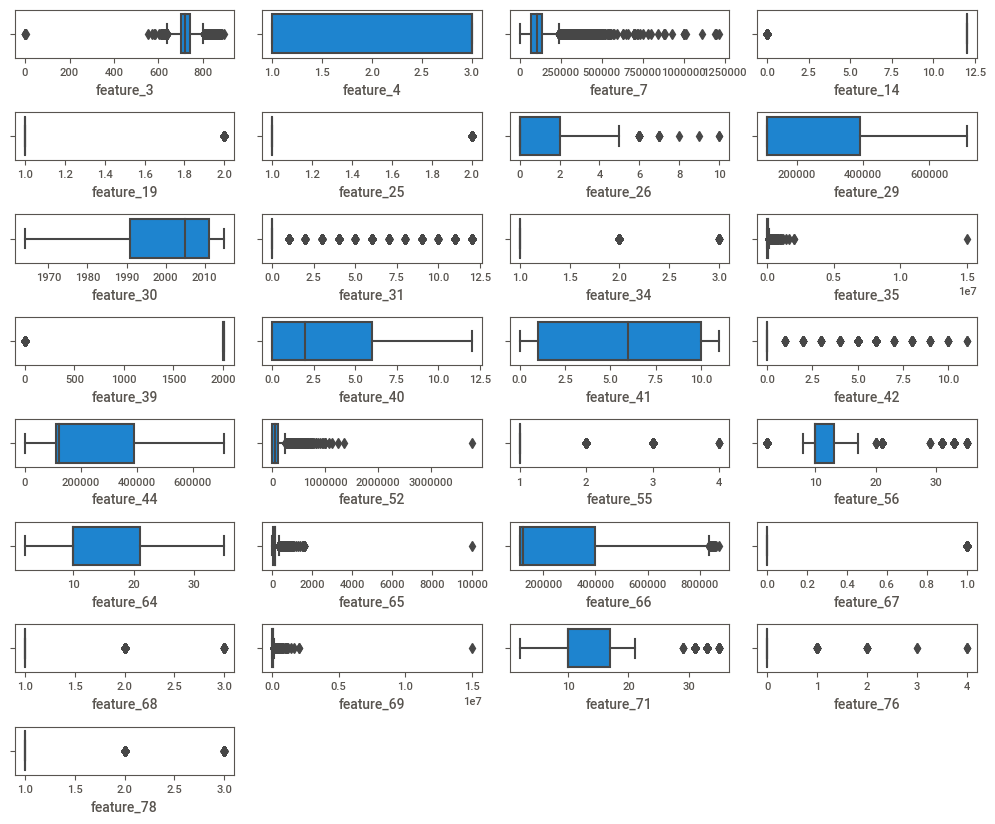

In [ ]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in num_data:
  ax=plt.subplot(10,4,plotnumber)
  sns.boxplot(data=data,x=data[column])
  plotnumber+=1
plt.tight_layout()

In [ ]:
no_handle=[]
for column in num_data:
  Q3=data[column].quantile(0.75)
  Q1=data[column].quantile(0.25)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  print(column,'lower_limit:',lower_limit,'upper_limit',upper_limit)
  outliers = (num_data[column] < lower_limit) | (num_data[column] > upper_limit)
  percent = outliers.mean()

  if percent > 0.05:
    no_handle.append(column)

feature_3 lower_limit: 638.5 upper_limit 802.5
feature_4 lower_limit: -2.0 upper_limit 6.0
feature_7 lower_limit: -28500.0 upper_limit 239500.0
feature_14 lower_limit: 12.0 upper_limit 12.0
feature_19 lower_limit: 1.0 upper_limit 1.0
feature_25 lower_limit: 1.0 upper_limit 1.0
feature_26 lower_limit: -3.0 upper_limit 5.0
feature_29 lower_limit: -309875.5 upper_limit 809928.5
feature_30 lower_limit: 1961.0 upper_limit 2041.0
feature_31 lower_limit: 0.0 upper_limit 0.0
feature_34 lower_limit: 1.0 upper_limit 1.0
feature_35 lower_limit: -64497.5 upper_limit 107498.5
feature_39 lower_limit: 1978.0 upper_limit 2034.0
feature_40 lower_limit: -9.0 upper_limit 15.0
feature_41 lower_limit: -12.5 upper_limit 23.5
feature_42 lower_limit: 0.0 upper_limit 0.0
feature_44 lower_limit: -309893.0 upper_limit 809939.0
feature_52 lower_limit: -150000.0 upper_limit 250000.0
feature_55 lower_limit: 1.0 upper_limit 1.0
feature_56 lower_limit: 5.5 upper_limit 17.5
feature_64 lower_limit: -6.5 upper_limit 37.

In [ ]:
no_handle

['feature_7',
 'feature_14',
 'feature_25',
 'feature_31',
 'feature_34',
 'feature_39',
 'feature_56',
 'feature_65',
 'feature_67',
 'feature_68',
 'feature_71']

In [ ]:
for column in num_data.drop(no_handle,axis=1):
  Q3=data[column].quantile(0.75)
  Q1=data[column].quantile(0.25)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  data.loc[(data[column]<lower_limit)|(data[column]>upper_limit),column]=data[column].median()

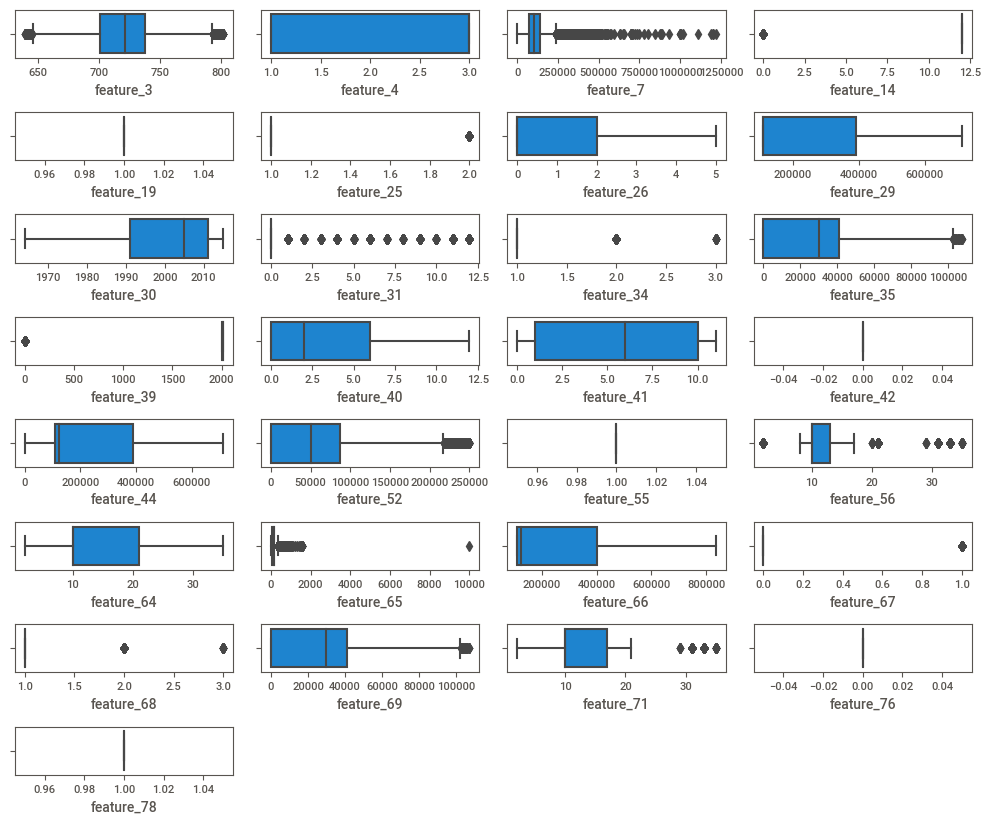

In [ ]:
plt.figure(figsize=(10,10))
plotnumber=1
for column in num_data:
  ax=plt.subplot(10,4,plotnumber)
  sns.boxplot(data=data,x=data[column])
  plotnumber+=1
plt.tight_layout()

#

### Data Scaling/Normalization:

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['feature_3', 'feature_4', 'feature_7', 'feature_14', 'feature_19',
       'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31',
       'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_44', 'feature_52', 'feature_55', 'feature_56',
       'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
       'feature_69', 'feature_71', 'feature_76', 'feature_78']]=scale.fit_transform(data[['feature_3', 'feature_4', 'feature_7', 'feature_14', 'feature_19',
                                                                                          'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31',
                                                                                          'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41',
                                                                                          'feature_42', 'feature_44', 'feature_52', 'feature_55', 'feature_56',
                                                                                          'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
                                                                                          'feature_69', 'feature_71', 'feature_76', 'feature_78']])

**Converting categorical data into numerical**

In [ ]:
cat_data=data.select_dtypes(include='O')
cat_data.columns

Index(['dt_opened', 'entry_time', 'feature_1', 'feature_2', 'feature_11',
       'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37',
       'feature_38', 'feature_43', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_50', 'feature_51', 'feature_53', 'feature_58',
       'feature_59', 'feature_60', 'feature_62', 'feature_63', 'feature_70',
       'feature_72', 'feature_75', 'feature_77', 'feature_79',
       'high_credit_amt', 'cur_balance_amt', 'cashlimit', 'creditlimit',
       'total_enq_amt'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
convert=[]
for column in cat_data:
  if len(data[column].unique())>3:
    data[column]=label.fit_transform(data[column])
  elif len(data[column].unique())<=3:
    convert.append(column)

In [ ]:
convert

['feature_11',
 'feature_23',
 'feature_33',
 'feature_50',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_62',
 'feature_72',
 'feature_79']

In [ ]:
for column in convert:
    unique_values = data[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in feature_11: ['Y' 'N']
Unique values in feature_23: ['N' 'Y']
Unique values in feature_33: ['Y' 'N']
Unique values in feature_50: ['Y' 'N']
Unique values in feature_58: ['Y' 'N']
Unique values in feature_59: ['Y' 'N']
Unique values in feature_60: ['N' 'Y']
Unique values in feature_62: ['Y' 'N']
Unique values in feature_72: ['R' 'O']
Unique values in feature_79: ['N' 'Y']


In [ ]:
# List of columns to convert
# For all except 'feature_72'

features_to_transform = ['feature_11', 'feature_23', 'feature_33', 'feature_50', 'feature_58',
                         'feature_59', 'feature_60', 'feature_62', 'feature_79']

for feature in features_to_transform:
    data[feature] = label.fit_transform(data[feature])

In [ ]:
# regarding 'feature_72'
data['feature_72']=pd.get_dummies(data['feature_72'],drop_first=True)

#

### Displaying correlation matrix:

In [ ]:
num_data.corr()

,feature_3,feature_4,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
feature_3,1.000000,-0.244546,0.300612,0.000409,0.036544,-0.107900,0.031748,-0.013415,-0.054855,0.004234,0.110020,0.052250,-0.109355,-0.077983,-0.006529,-0.041024,-0.018789,0.056958,0.038684,0.056112,0.028380,-0.038780,-0.057687,-0.064111,0.110020,0.052250,0.029551,-0.008012,-0.005501
feature_4,-0.244546,1.000000,-0.092159,0.090714,-0.026393,0.028709,0.186957,-0.152153,0.036611,-0.222876,-0.074237,0.004941,0.074801,0.000208,0.027442,0.018673,-0.149460,0.062276,-0.026692,0.014438,0.043182,0.076695,-0.073999,0.085263,-0.074237,0.004941,0.032572,-0.018708,0.024352
feature_7,0.300612,-0.092159,1.000000,-0.007433,-0.018849,-0.126479,0.086991,0.044309,-0.061531,-0.023632,0.113484,0.091290,-0.113239,-0.078877,0.013453,-0.042683,0.039723,0.573739,-0.009875,0.024565,-0.000851,-0.056591,-0.007093,-0.060804,0.113484,0.091290,0.000597,0.048119,-0.009618
feature_14,0.000409,0.090714,-0.007433,1.000000,-0.022227,0.002186,-0.005523,-0.412585,-0.031041,-0.040439,0.008497,-0.041926,-0.009130,-0.066176,-0.026739,0.004551,-0.407595,0.011326,-0.026364,-0.008532,0.036222,0.073241,-0.241405,0.137769,0.008497,-0.041926,0.035512,-0.036781,-0.062174
feature_19,0.036544,-0.026393,-0.018849,-0.022227,1.000000,0.016502,-0.045115,-0.017425,0.033750,0.011191,0.029353,-0.003764,-0.029140,-0.014977,-0.037409,-0.006595,-0.018501,-0.039237,0.918357,-0.007106,-0.012418,-0.022052,-0.047027,-0.037576,0.029353,-0.003764,-0.008847,0.010217,0.003474
feature_25,-0.107900,0.028709,-0.126479,0.002186,0.016502,1.000000,-0.248867,-0.044356,0.054272,0.007362,-0.101519,-0.027017,0.102879,0.081007,-0.131980,0.097925,-0.033898,-0.058729,-0.039841,-0.027137,0.004380,0.028327,0.009110,0.071602,-0.101519,-0.027017,0.023313,-0.013503,0.010019
feature_26,0.031748,0.186957,0.086991,-0.005523,-0.045115,-0.248867,1.000000,0.088713,-0.029610,-0.167786,0.014501,0.057395,-0.013954,-0.029631,0.100491,-0.047998,0.085234,0.110838,-0.032897,0.047401,0.026892,-0.012500,0.042741,-0.029461,0.014501,0.057395,0.022745,0.013814,0.017826
feature_29,-0.013415,-0.152153,0.044309,-0.412585,-0.017425,-0.044356,0.088713,1.000000,0.077398,-0.019985,-0.006451,0.080470,0.007195,0.082182,0.069432,-0.005961,0.983204,0.049173,-0.015149,0.088064,-0.022602,-0.152658,0.650677,-0.200882,-0.006451,0.080470,-0.049596,0.022407,0.028278
feature_30,-0.054855,0.036611,-0.061531,-0.031041,0.033750,0.054272,-0.029610,0.077398,1.000000,-0.006384,-0.211073,0.013549,0.212626,0.156723,0.117605,0.051861,0.076640,-0.049564,0.038677,0.047992,0.141263,0.128527,0.235309,0.359842,-0.211073,0.013549,0.033412,-0.010196,0.051184
feature_31,0.004234,-0.222876,-0.023632,-0.040439,0.011191,0.007362,-0.167786,-0.019985,-0.006384,1.000000,0.026071,-0.022156,-0.027309,0.123645,-0.030032,0.018664,-0.020972,-0.047951,0.013819,-0.009880,-0.012905,-0.011119,-0.026225,-0.028672,0.026071,-0.022156,-0.011826,-0.002327,-0.052945


In [ ]:
#To get highly corelated features
pd.set_option('display.max_rows',None)
corrmat = num_data.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr
0,feature_34,feature_39,0.995822
1,feature_39,feature_34,0.995822
2,feature_39,feature_68,0.995822
3,feature_68,feature_39,0.995822
4,feature_29,feature_44,0.983204
5,feature_44,feature_29,0.983204
6,feature_55,feature_19,0.918357
7,feature_19,feature_55,0.918357


In [ ]:
# Removing the highly correlated features from the data based on the above
data.drop(['feature_39','feature_29','feature_19'],axis=1,inplace=True)

In [ ]:
# describing num_col
num_col=data.select_dtypes(include='float64')

<Axes: >

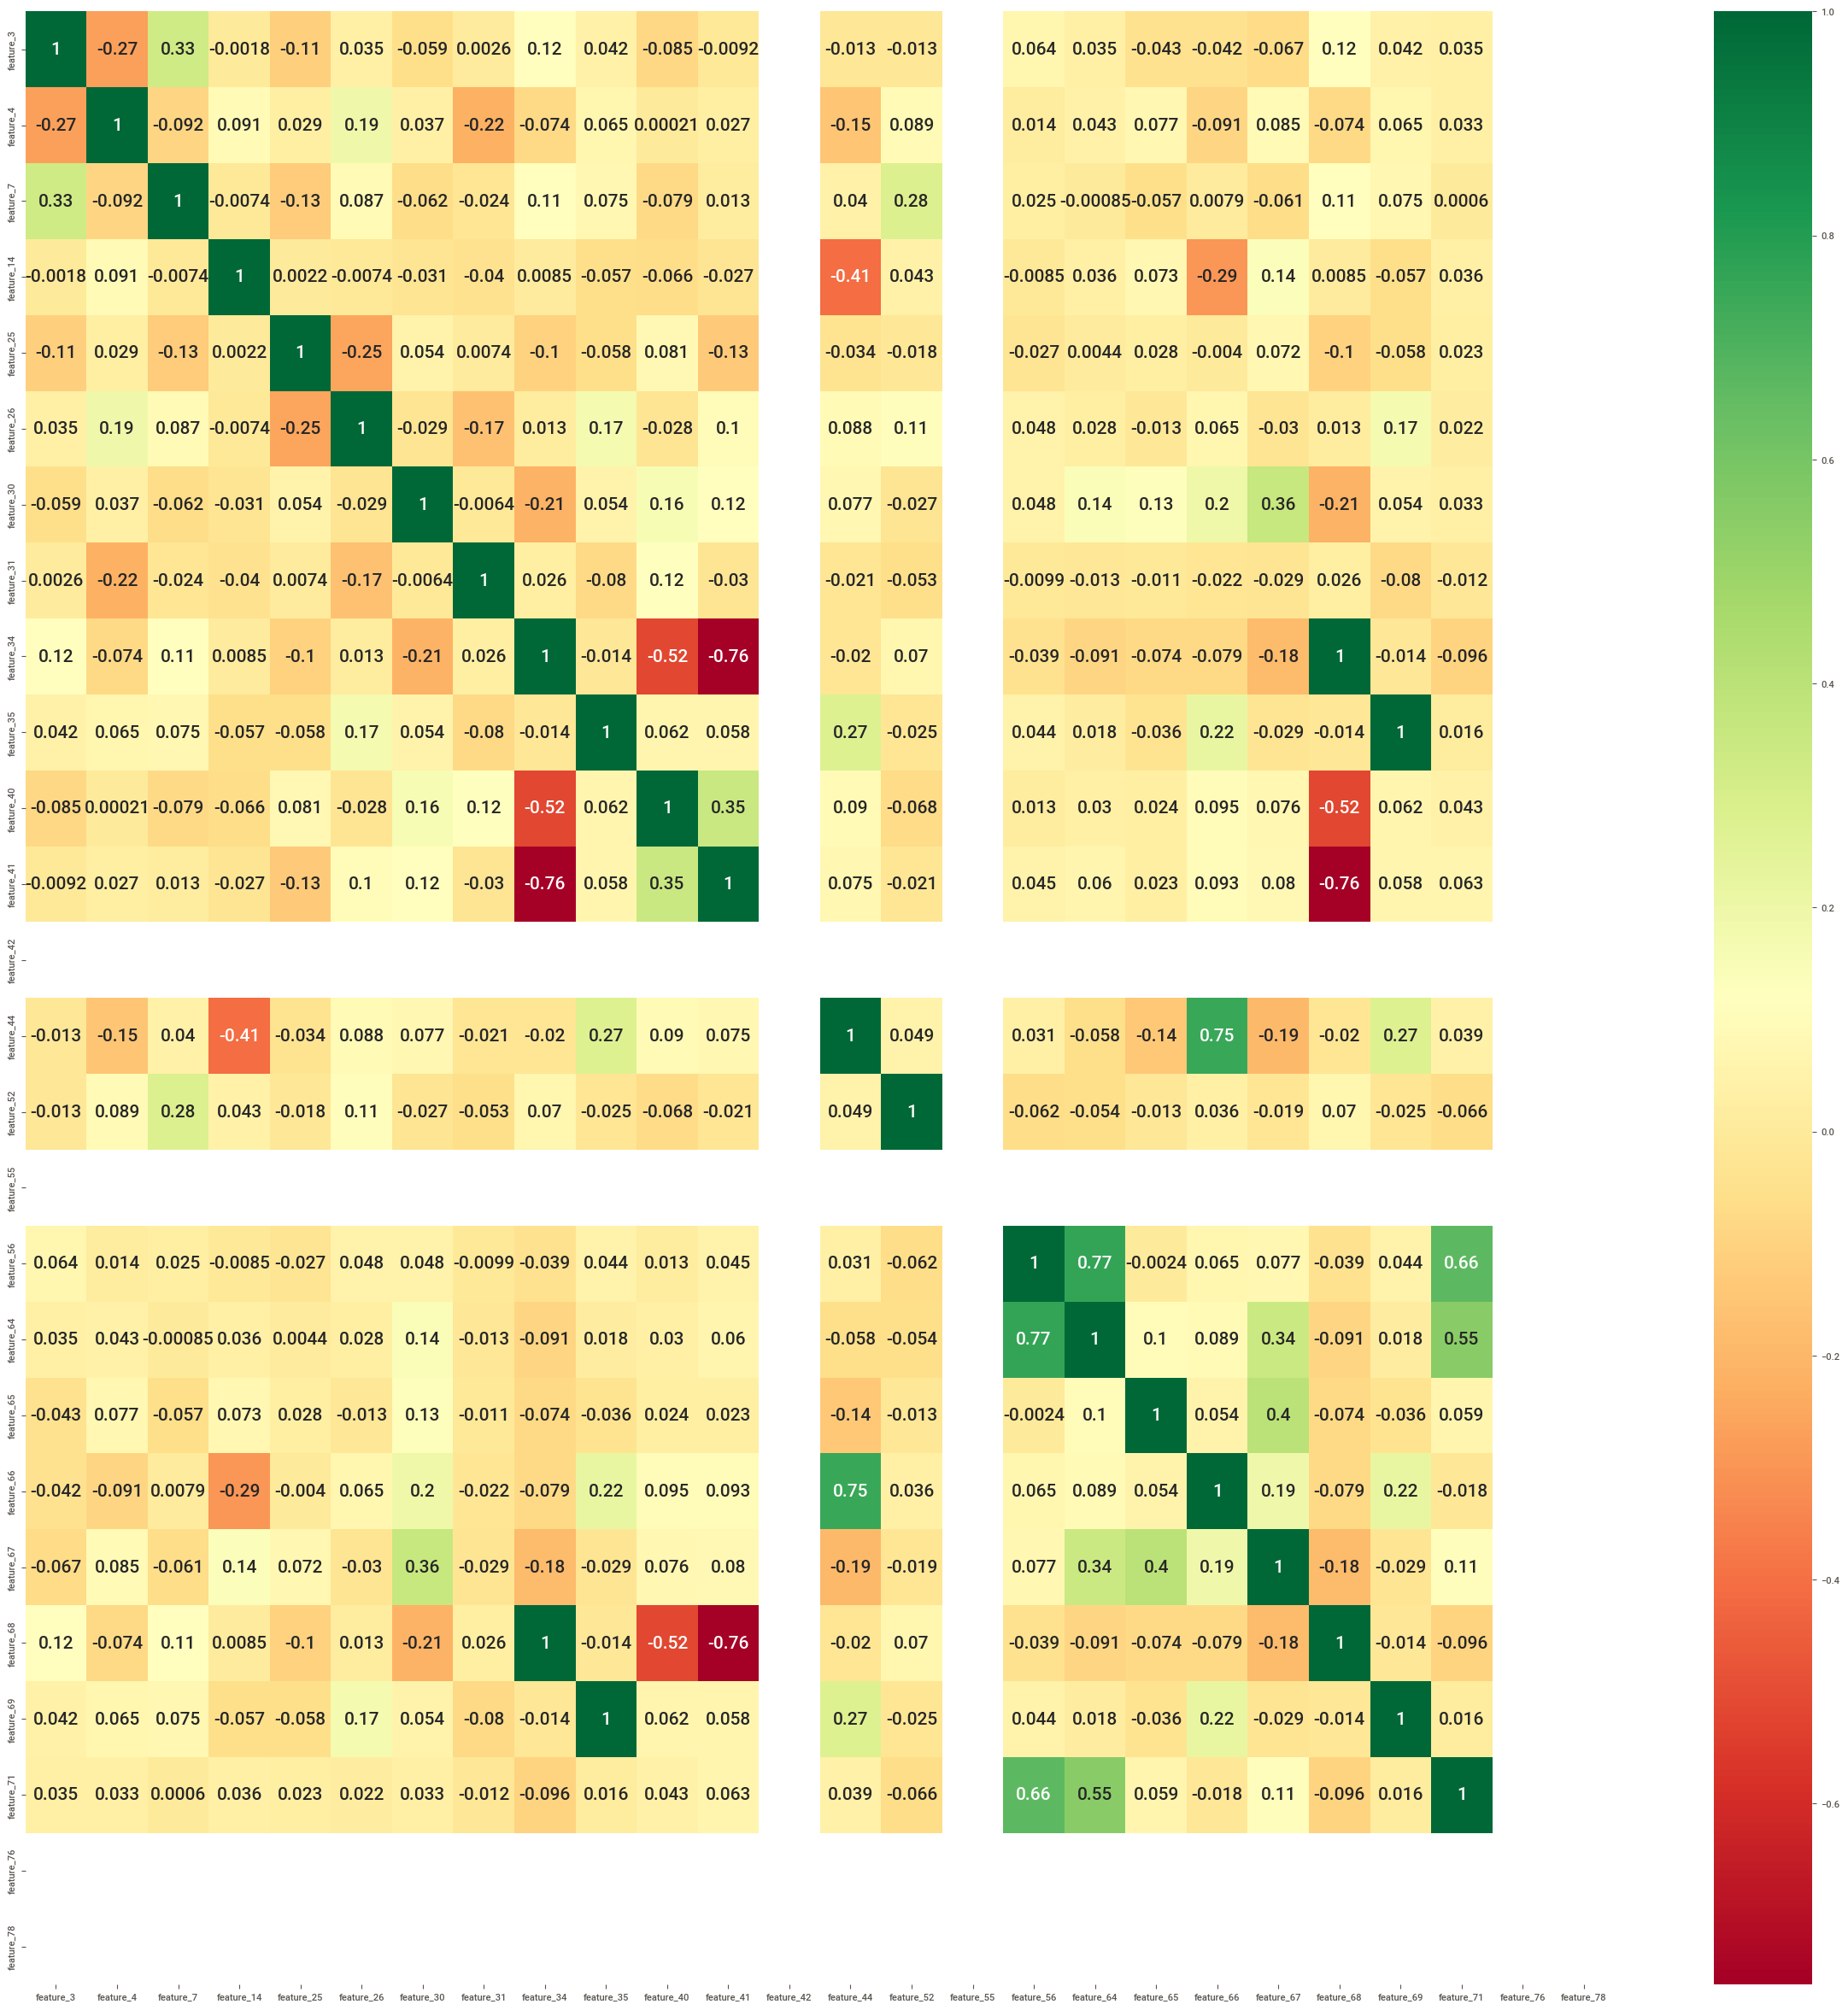

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(num_col.corr(),annot=True,cmap="RdYlGn", annot_kws={"size":15})

#

### Feature Selection - continuation:

#### **Drop unique and constant features**

In [ ]:
data.drop(['Unnamed: 0','dt_opened','entry_time','customer_no.1'],axis=1,inplace=True)

In [ ]:
data=data.astype('int64')

In [ ]:
# Final data for model creation
data.shape

(23896, 71)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_no      23896 non-null  int64
 1   feature_1        23896 non-null  int64
 2   feature_2        23896 non-null  int64
 3   feature_3        23896 non-null  int64
 4   feature_4        23896 non-null  int64
 5   feature_7        23896 non-null  int64
 6   feature_11       23896 non-null  int64
 7   feature_12       23896 non-null  int64
 8   feature_13       23896 non-null  int64
 9   feature_14       23896 non-null  int64
 10  feature_15       23896 non-null  int64
 11  feature_16       23896 non-null  int64
 12  feature_20       23896 non-null  int64
 13  feature_21       23896 non-null  int64
 14  feature_22       23896 non-null  int64
 15  feature_23       23896 non-null  int64
 16  feature_24       23896 non-null  int64
 17  feature_25       23896 non-null  int64
 18  featur

#

### Splitting the data for Training and Testing:

In [ ]:
x=data.drop('Bad_label',axis=1)
y=data['Bad_label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# Check the size of the train and test sets
print("Size of x_train : ", x_train.shape)
print("Size of x_test  : ", x_test.shape)
print("Size of y_train : ", y_train.shape)
print("Size of y_test  : ", y_test.shape)

Size of x_train :  (16727, 70)
Size of x_test  :  (7169, 70)
Size of y_train :  (16727,)
Size of y_test  :  (7169,)


#

### Balancing the Data:

In [ ]:
data['Bad_label'].value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [ ]:
print('Actual classes:', Counter(y_train))
print('Somte classes:', Counter(y_smote))

Actual classes: Counter({0: 16008, 1: 719})
Somte classes: Counter({0: 16008, 1: 16008})


#

# Model Creation:

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 

#### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# defining the LR
LR = LogisticRegression()

# Fit the Logistic Regression model on the oversampled training data
LR.fit(x_smote, y_smote)

LogisticRegression()

In [ ]:
# Predict on the training data
y_train_pred = LR.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_lr = accuracy_score(y_smote, y_train_pred)

In [ ]:
# Predict on the testing data
y_test_pred=LR.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_lr = accuracy_score(y_test,y_test_pred)

In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_lr:.2f}")
print(f"Testing Accuracy: {testing_accuracy_lr:.2f}")

Training Accuracy: 0.57
Testing Accuracy: 0.54


#

#### 2. Support Vector machine

In [ ]:
from sklearn.svm import SVC

svc=SVC()

# Fit the SVC model on the oversampled training data
svc.fit(x_smote,y_smote)

SVC()

In [ ]:
# Predict on the training data
y_train_pred = svc.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_svc = accuracy_score(y_smote, y_train_pred)

In [ ]:
# Predict on the testing data
y_test_pred = svc.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_svc = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_svc:.3f}")
print(f"Testing Accuracy: {testing_accuracy_svc:.3f}")

Training Accuracy: 0.668
Testing Accuracy: 0.548


#

#### 3. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

# Fit the Decision Tree Classifier model on the oversampled training data
model.fit(x_smote, y_smote)

DecisionTreeClassifier()

In [ ]:
# Predict on the training data
y_train_pred = model.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_dt = accuracy_score(y_smote, y_train_pred)

In [ ]:
# Predict on the testing data
y_test_pred = model.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_dt = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_dt:.3f}")
print(f"Testing Accuracy: {testing_accuracy_dt:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.882


#### Hyperparameter Tuning for Decision Tree Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "criterion": ["gini"],
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 20)),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(1, 20)),
}

DTC = DecisionTreeClassifier(random_state=42)
DT_cv = RandomizedSearchCV(
    estimator=DTC, scoring='accuracy', param_distributions=params, n_iter=100, cv=3,
    verbose=2, random_state=42, n_jobs=-1
)
DT_cv.fit(x_smote, y_smote)
DT_best_params = DT_cv.best_params_
print(f"Best parameters: {DT_best_params}")

# Training the model with best parameters
model = DecisionTreeClassifier(
    criterion=DT_best_params['criterion'],
    max_depth=DT_best_params['max_depth'],
    min_samples_split=DT_best_params['min_samples_split'],
    min_samples_leaf=DT_best_params['min_samples_leaf'],
    splitter=DT_best_params['splitter']
)
model.fit(x_smote, y_smote)  # Training the model
y_pred = model.predict(x_test)  # Prediction

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 18, 'criterion': 'gini'}


In [ ]:
# Calculate the testing accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {accuracy:.3f}")

Testing Accuracy: 0.894


In [ ]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate Gini coefficient from the ROC AUC
gini = 2 * roc_auc - 1

print(f"Gini: {gini * 100:.2f}%")

Gini: 1.80%


#

#### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

# Fit the Random Forest Classifier model on the oversampled training data
model.fit(x_smote, y_smote)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the training data
y_train_pred = model.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_rf = accuracy_score(y_smote, y_train_pred)

In [ ]:
# Predict on the testing data
y_test_pred = model.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_rf = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_rf:.2f}")
print(f"Testing Accuracy: {testing_accuracy_rf:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.96


In [ ]:
# Calculate the ROC AUC score for testing data
roc_auc = roc_auc_score(y_test, y_test_pred)

# Calculate Gini coefficient from the ROC AUC
gini = 2 * roc_auc - 1

print(f"Gini: {gini * 100:.2f}%")

Gini: 0.34%


#

#### 5. K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier()

# Fit the KNN model on the oversampled training data
KNN.fit(x_smote, y_smote)

# Predict on the training data
y_train_pred = KNN.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_knn = accuracy_score(y_smote, y_train_pred)

# Predict on the testing data
y_test_pred = KNN.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_knn = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_knn:.2f}")
print(f"Testing Accuracy: {testing_accuracy_knn:.2f}")

Training Accuracy: 0.91
Testing Accuracy: 0.73


In [ ]:
# Calculate the ROC AUC score for testing data
roc_auc = roc_auc_score(y_test, y_test_pred)

# Calculate Gini coefficient from the ROC AUC
gini = 2 * roc_auc - 1

print(f"Gini: {gini * 100:.2f}%")

Gini: 0.53%


#

#### 6. XGBoosting Classifier

In [ ]:
from xgboost import XGBClassifier

model=XGBClassifier()

# Fit the XGBoost Classifier model on the oversampled training data
model.fit(x_smote, y_smote)

# Predict on the training data
y_train_pred = model.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_xgb = accuracy_score(y_smote, y_train_pred)

# Predict on the testing data
y_test_pred = model.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_xgb = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_xgb:.2f}")
print(f"Testing Accuracy: {testing_accuracy_xgb:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.96


In [ ]:
# Calculate the ROC AUC score for testing data
roc_auc = roc_auc_score(y_test, y_test_pred)

# Calculate Gini coefficient from the ROC AUC
gini = 2 * roc_auc - 1

print(f"Gini: {gini * 100:.2f}%")

Gini: 0.15%


#

#### Hyperparameter Tuning for XGBoost model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9,10],
              'n_estimators': [50,80,100,130,150],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2,0.4]}

XGB2=XGBClassifier(random_state=42,verbosity=0)

rcv= RandomizedSearchCV(estimator=XGB2,
                        scoring='f1',
                        param_distributions=param_grid,
                        n_iter=100, cv=3,
                        verbose=2,
                        random_state=42,
                        n_jobs=-1)

rcv.fit(x_smote,y_smote)         # training data on randomsearch cv
cv_best_params=rcv.best_params_  # it will give you best parameters
print(f'Best parameters: {cv_best_params})')

XGB2HP=XGBClassifier(reg_lambda= 0,
                   reg_alpha= 0.4,
                   n_estimators=150,
                   max_depth=10,
                   learning_rate=0.1,
                   gamma=0.2)

# Fit the XGBoost Classifier model with tuned hyperparameters on the oversampled training data
XGB2HP.fit(x_smote, y_smote)

# Predict on the training data
y_train_pred = XGB2HP.predict(x_smote)

# Calculate the training accuracy score
training_accuracy_xgb2hp = accuracy_score(y_smote, y_train_pred)

# Predict on the testing data
y_test_pred = XGB2HP.predict(x_test)

# Calculate the testing accuracy score
testing_accuracy_xgb2hp = accuracy_score(y_test, y_test_pred)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'reg_lambda': 0, 'reg_alpha': 0.4, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2})


In [ ]:
# Print the accuracy scores
print(f"Training Accuracy: {training_accuracy_xgb2hp:.2f}")
print(f"Testing Accuracy: {testing_accuracy_xgb2hp:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.96


In [ ]:
# Calculate the ROC AUC score for testing data
roc_auc = roc_auc_score(y_test, y_test_pred)

# Calculate Gini coefficient from the ROC AUC
gini = 2 * roc_auc - 1

print(f"Gini: {gini * 100:.2f}%")

Gini: 0.13%


### The Accuracy is very high and Gini Scores are very low. So Checking for overfitting of the XGB model

#### Checking Learning Curves for XGB model:
Plot learning curves to visualize the model's performance as the training dataset size increases. If the training and testing curves converge and plateau, the model is not overfitting.

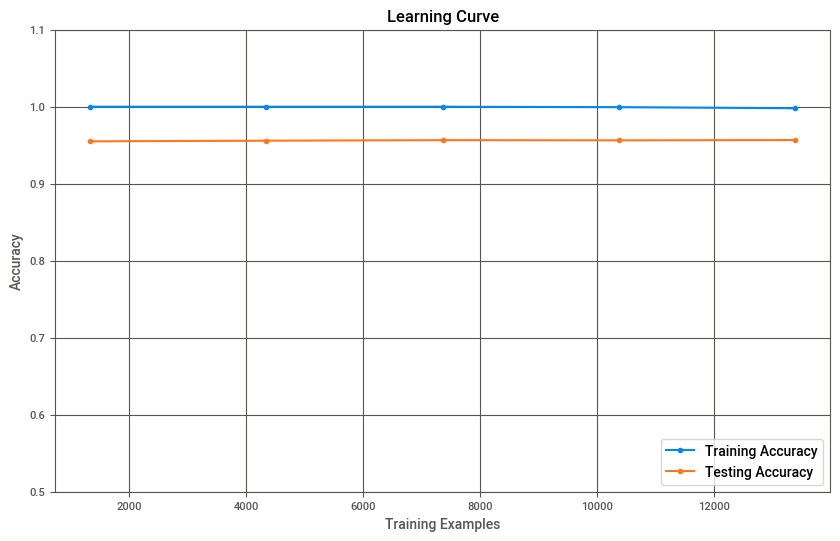

In [ ]:
from sklearn.model_selection import learning_curve

# Create an XGBoost classifier model
model = XGBClassifier()

# Create learning curves
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5, scoring='accuracy')

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy', marker='o', linestyle='-')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing Accuracy', marker='o', linestyle='-')

# Set y-axis limits from 0.5 to 1.1
plt.ylim(0.5, 1.1)

# Customize the plot
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

Here are some scenarios and what they might indicate: <br>

1. Training and testing accuracy both increase and converge : Good model performance, not overfitting.
2. Training accuracy high, testing accuracy low             : Overfitting.
3. Training accuracy and testing accuracy both low          : High bias (underfitting).


**Based on the above learning curves, it is a Good model performance, not overfitting.**

#

## Accuracy Comparison and Evaluation:

In [ ]:
from tabulate import tabulate

In [ ]:
# Define model names and their corresponding accuracy scores
models = ["Logistic Regression", "Support Vector Machine", "Decision Tree", "Random Forest", "K-Nearest Neighbors", "XGBoost Classifier", "XGBoost with Hyperparameter Tuning"]
training_accuracies = [training_accuracy_lr, training_accuracy_svc, training_accuracy_dt, training_accuracy_rf, training_accuracy_knn, training_accuracy_xgb, training_accuracy_xgb2hp ]
testing_accuracies = [testing_accuracy_lr, testing_accuracy_svc, testing_accuracy_dt, testing_accuracy_rf, testing_accuracy_knn, testing_accuracy_xgb, testing_accuracy_xgb2hp ]

In [ ]:
# Create a table using tabulate
model_scores = [["Model", "Training Accuracy", "Testing Accuracy"]]
for model, train_acc, test_acc in zip(models, training_accuracies, testing_accuracies):
    model_scores.append([model, train_acc, test_acc])

# Print the table
table = tabulate(model_scores, tablefmt="grid")
print(table)

+------------------------------------+--------------------+--------------------+
| Model                              | Training Accuracy  | Testing Accuracy   |
+------------------------------------+--------------------+--------------------+
| Logistic Regression                | 0.569371564217891  | 0.544148416794532  |
+------------------------------------+--------------------+--------------------+
| Support Vector Machine             | 0.667947276361819  | 0.5477751429767053 |
+------------------------------------+--------------------+--------------------+
| Decision Tree                      | 1.0                | 0.8822708885479146 |
+------------------------------------+--------------------+--------------------+
| Random Forest                      | 1.0                | 0.9570372436881015 |
+------------------------------------+--------------------+--------------------+
| K-Nearest Neighbors                | 0.9078585707146427 | 0.7263216627144651 |
+---------------------------

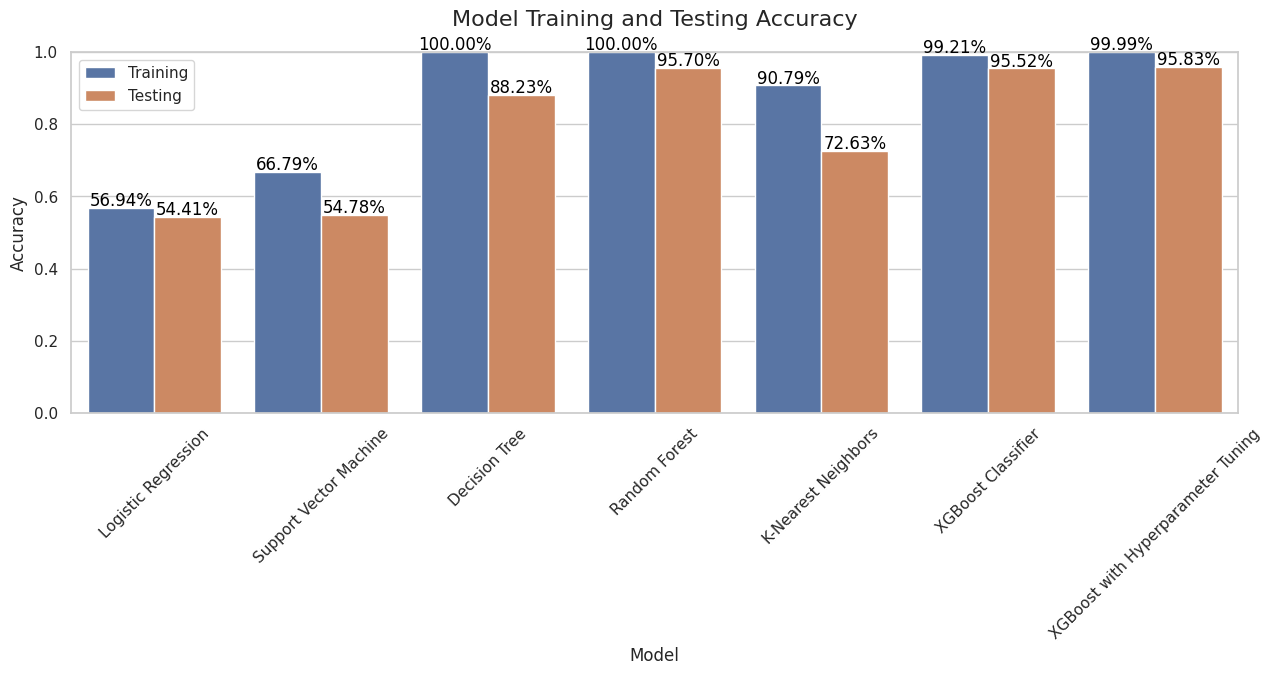

In [ ]:
# Create two DataFrames for visualization
training_accuracy_df = pd.DataFrame({"Model": models, "Accuracy": training_accuracies, "Dataset": "Training"})
testing_accuracy_df = pd.DataFrame({"Model": models, "Accuracy": testing_accuracies, "Dataset": "Testing"})

# Combine the two DataFrames
accuracy_df = pd.concat([training_accuracy_df, testing_accuracy_df])

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot with training accuracies on the left and testing accuracies on the right
plt.figure(figsize=(13, 7))
ax = sns.barplot(data=accuracy_df, x="Model", y="Accuracy", hue="Dataset")
ax.set(ylim=(0, 1))  # Set the y-axis limit

# Display the % accuracy inside each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Customize the plot
plt.xticks(rotation=45)
plt.title("Model Training and Testing Accuracy", y=1.05, fontsize=16)  # Increase the title size
plt.xlabel("Model")
plt.ylabel("Accuracy")

# Add a legend
plt.legend(loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()


#

## Conclusion:

* Accuracies are subject to change on each run (especially the gini scores)

For prediction of the Credit rating, from the above Evaluation testing accuracies, it is clear that

1. **Random Forest,** **XGBoost model** & **XGBoost with Hyperparameter Tuning**
models perform very well.

2. **Decision tree** also performs well but not as par as the above 3.<br>

3. The rest are not reliable, hence ignore.

Also The Gini scores of the above gives Positive values and also some are above the benchmark value as given in the question.

#

---
---

<h1 align='center'><b>End of Project. Thank You!</b></h1>

<h4 align='center'><b> 
    <a href="#Datamites-Client-Project">Go to Top</a>
</b></h4>

---
---